# Linear Models - Logistic Regression (LogR)

_Walked through by Rikki Shomer_  
_11.20.18_

## Using linear methods for classification - LogR
### Loading the UCI Pima Diabetes data

In [1]:
import pandas as pd

In [2]:
data_web_address = "../Datasets/diabetes.csv"

In [3]:
column_names = ['pregnancy_x',
                 'plasma_con',
                 'blood_pressure',
                 'skin_mm',
                 'insulin',
                 'bmi',
                 'pedigree_func',
                 'age',
                 'target']

In [4]:
feature_names = column_names[:-1]

In [5]:
all_data = pd.read_csv(data_web_address, names=column_names, skiprows=[0])

### Viewing the dataset with Pandas

In [6]:
all_data.head()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Is an insulin level of 0 possible?  Is a skim_mm of 0 possible?
all_data.describe()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


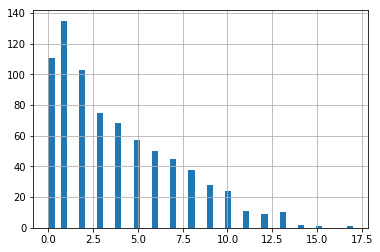

In [8]:
# The features plasma_con, blood_pressure, skin_mm, insulin,
#  and bmi have 0s as values.  These values could be physically 
#  impossible

#If within a notebook, include this line to visualize within the notebook
%matplotlib inline

#the default is bins=10, which is hard to read in a visualization
all_data.pregnancy_x.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a3a4e4080>,
      dtype=object)

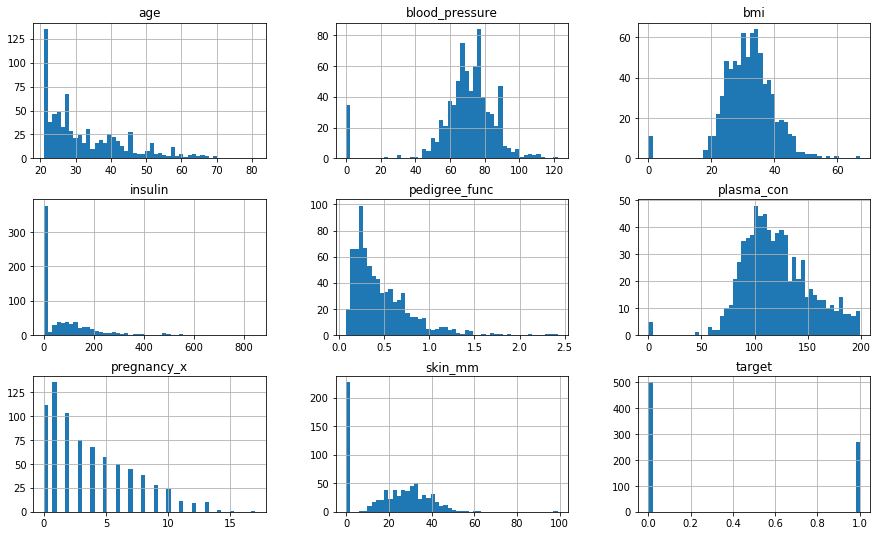

In [9]:
all_data.hist(figsize=(15, 9), bins=50)

In [10]:
all_data.target.value_counts()

0    500
1    268
Name: target, dtype: int64

## Machine Learning with LogR

### Define X - feature array, and y - target array

In [11]:
import numpy as np
np.random.seed(0)

import pandas as pd

X = all_data[feature_names]
y = all_data['target']

### Provide training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7, 
                                                    stratify=y)

### Train the LogR

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

### Score the LogR

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7467532467532467

## Examining LogR errors with a confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [1, 0])

array([[27, 27],
       [12, 88]])

## Varying the classification threshold in LogR

In [16]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[0.87110781, 0.12889219],
       [0.84000194, 0.15999806],
       [0.81826801, 0.18173199],
       [0.7397854 , 0.2602146 ],
       [0.80394149, 0.19605851],
       [0.97662039, 0.02337961],
       [0.91419969, 0.08580031],
       [0.69099883, 0.30900117],
       [0.84741806, 0.15258194],
       [0.4246712 , 0.5753288 ],
       [0.80530126, 0.19469874],
       [0.45489532, 0.54510468],
       [0.76047739, 0.23952261],
       [0.78348266, 0.21651734],
       [0.26617869, 0.73382131],
       [0.92886803, 0.07113197],
       [0.48232358, 0.51767642],
       [0.76435922, 0.23564078],
       [0.72847674, 0.27152326],
       [0.97184299, 0.02815701],
       [0.38361532, 0.61638468],
       [0.37864436, 0.62135564],
       [0.69899829, 0.30100171],
       [0.63860588, 0.36139412],
       [0.26274747, 0.73725253],
       [0.68877387, 0.31122613],
       [0.69870409, 0.30129591],
       [0.904541  , 0.095459  ],
       [0.82253718, 0.17746282],
       [0.20751107, 0.79248893],
       [0.

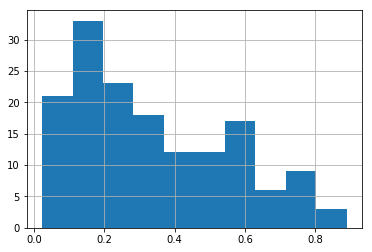

In [17]:
pd.Series(y_pred_proba[:, 1]).hist()

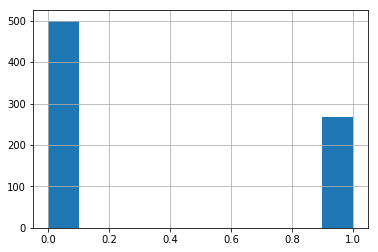

In [18]:
all_data['target'].hist()

In [19]:
from sklearn.preprocessing import binarize

In [20]:
y_pred_default = binarize(y_pred_proba, threshold=0.5)
y_pred_default

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [21]:
y_pred_default[:, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [22]:
confusion_matrix(y_test, y_pred_default[:, 1], labels=[1, 0])

array([[27, 27],
       [12, 88]])

In [23]:
y_pred_low = binarize(y_pred_proba, threshold=0.2)
confusion_matrix(y_test, y_pred_low[:, 1], labels=[1, 0])
#positive class is '1' again

array([[50,  4],
       [48, 52]])

In [24]:
import matplotlib.pyplot as plt

def npv_func(th):
    y_pred_low = binarize(y_pred_proba, threshold=th)
    
    second_column = confusion_matrix(y_test, 
                                     y_pred_low[:, 1], 
                                     labels=[1, 0])[:, 1]
    npv = second_column[1]/second_column.sum()
    return npv

npv_func(0.2)

0.9285714285714286

/home/mayuri/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


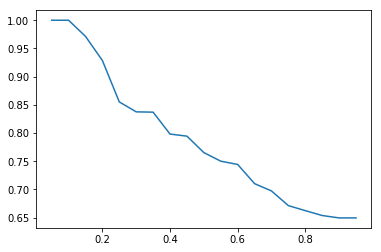

In [25]:
ths = np.arange(0, 1, 0.05)

npvs = []

for th in np.arange(0, 1.00, 0.05):
    npvs.append(npv_func(th))
    
plt.plot(ths, npvs)

## Receiver operating characteristic - ROC

### Calculating true positive rate (TPR)

In [26]:
from sklearn.metrics import  roc_curve

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:, 1])

### Plotting sensitivity

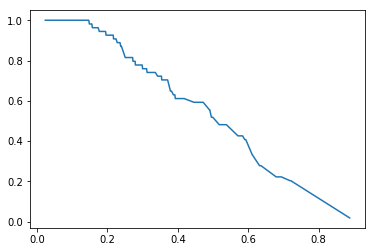

In [27]:
plt.plot(ths, tpr)

In [28]:
y_pred_th = binarize(y_pred_proba, threshold=0.1)
confusion_matrix(y_test, y_pred_th[:, 1], labels=[1, 0])

array([[54,  0],
       [81, 19]])

In [29]:
y_pred_th = binarize(y_pred_proba, threshold=0.146)
confusion_matrix(y_test, y_pred_th[:, 1], labels=[1, 0])

array([[54,  0],
       [67, 33]])

### Plotting ROC without context

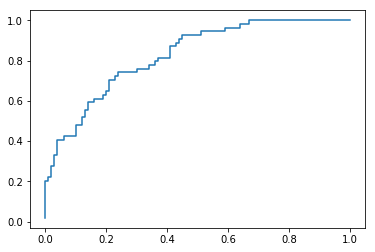

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)

### Area under the ROC curve

In [31]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.8251851851851852

## UIC breast cancer dataset

In [32]:
import numpy as np
np.random.seed(10)
import pandas as pd

data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['radius', 
                'texture', 
                'perimeter', 
                'area', 
                'smoothness', 
                'compactness', 
                'concavity', 
                'concave point',
                'symmetry', 
                'malignant']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address, names=column_names)

In [33]:
all_data.dtypes

radius            int64
texture           int64
perimeter         int64
area              int64
smoothness        int64
compactness      object
concavity         int64
concave point     int64
symmetry          int64
malignant         int64
dtype: object

In [34]:
#changing the state of hanving cancer to 1, not having cancer to 0
all_data['malignant'] = all_data['malignant'].astype(np.int)
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1, 0)
#4, and now 1 means malignant
all_data['malignant'].value_counts()

0    458
1    241
Name: malignant, dtype: int64

In [35]:
X = all_data[[col for col in feature_names if col != 'compactness']]
y = all_data.malignant

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

#Train and test the log reg   
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)

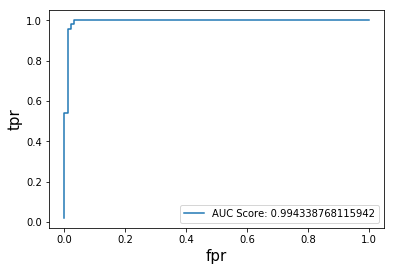

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:, 1])

auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label="AUC Score: " + str(auc_score))
plt.xlabel('fpr', fontsize='15')
plt.ylabel('tpr', fontsize='15')
plt.legend(loc='best')